# Models for predicting salary band

Here we implement some candidate models with different feature sets and evaluate each model using some performance metrics.

Informed by the exploratory analysis, our modelling strategy is as follows:

1. Train model for predicting salary band for population using logistic regression with coarse features outlined in the EDA.
2. Train model for predicting salary band for population using XGBoost with coarse features outlined in the EDA.
3. Train model for predicting salary band for population using XGBoost with original granular features.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath("../"))

from src.data_validation import extract_schema
from src.model import model_pipeline, plot_feature_importance
from src.config import model_v0_features, model_v1_features, model_v2_features, categorical_features, numeric_features, clean_vars

The data files come with no headers and these must be extracted from the metadata file.

In [2]:
schema = extract_schema('../data/census_income_metadata.txt')

In [3]:
census_income_learn = pd.read_csv('../data/census_income_learn.csv', names = schema.keys(), index_col=False)
census_income_test = pd.read_csv('../data/census_income_test.csv', names = schema.keys(), index_col=False)

## Model v0: Logistic regression with coarse features

This is the baseline model against which other complex models will be compared against. A grouping of categorical variables is required because logistic regression struggles with high-cardinality feature sets. We also bin the continuous age variable since the relationship between income and age is unlikely to be linear, as informed by the EDA.

Data cleaning complete
Feature engineering complete
Model training complete


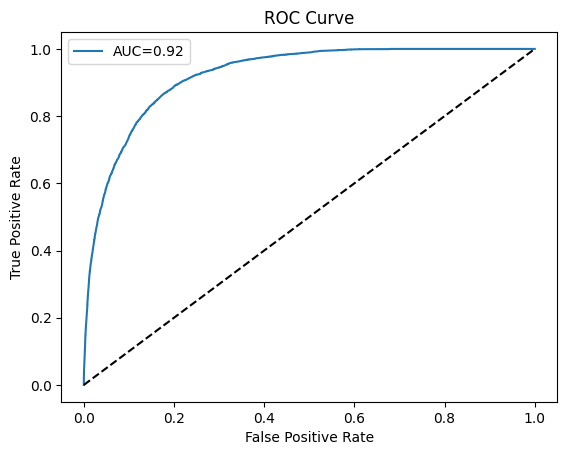

Model evaluation complete


In [4]:
model_v0, eval_metrics_v0, importance_df_v0 = model_pipeline(census_income_learn, census_income_test, clean_vars, model_v0_features, 'salary', 'instance weight', 'log_reg', numeric_features, categorical_features)

In [5]:
eval_metrics_v0

{'balanced_accuracy': 0.8440754893294635,
 'precision': 0.24576293699223728,
 'recall': 0.8705156974405589,
 'f1': 0.3833102021334397}

In [6]:
importance_df_v0.sort_values('importance', ascending = False)

,feature,importance
19,cat__education_mapped_Children,3.669859
2,cat__age_mapped_0-20,2.216406
21,cat__education_mapped_Postgrad/Prof degree,2.000922
8,cat__class_of_worker_mapped_No pay,1.415893
18,cat__education_mapped_Bachelors degree,1.378763
0,num__weeks worked in year,1.096689
12,cat__occupation_mapped_Armed Forces,1.071742
39,cat__sex_ Female,1.017246
22,cat__education_mapped_Primary school,0.999646
14,cat__occupation_mapped_Clerical,0.994027


## Model v1: CatBoost model with coarse features

We introduce a CatBoost model which, being a tree-based model, is able to capture non-linearities in the data. For model v1, we use this more complex model architecture with the coarse feature set.

Data cleaning complete
Feature engineering complete
Model training complete


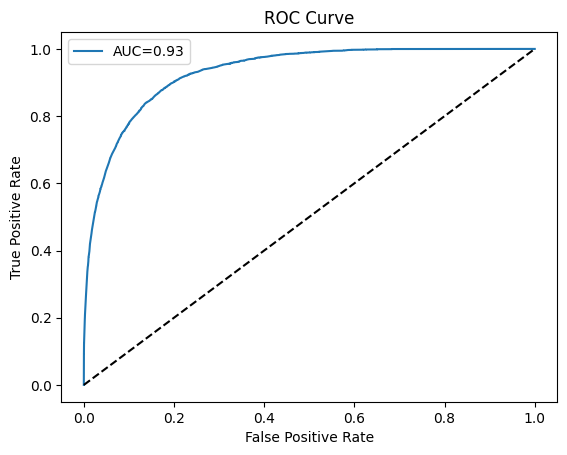

Model evaluation complete


In [7]:
model_v1, eval_metrics_v1, importance_df_v1 = model_pipeline(census_income_learn, census_income_test, clean_vars, model_v1_features, 'salary', 'instance weight', 'catboost', numeric_features, categorical_features)

In [8]:
eval_metrics_v1

{'balanced_accuracy': 0.8518754598892434,
 'precision': 0.2639836758202143,
 'recall': 0.8691710510152711,
 'f1': 0.4049702366847948}

In [9]:
importance_df_v1.sort_values('importance', ascending = False)

,feature,importance
2,cat__age_mapped_0-20,15.970485
19,cat__education_mapped_Children,14.401192
0,num__weeks worked in year,12.631111
1,num__log_capital_gains,8.609937
39,cat__sex_ Female,4.607887
22,cat__education_mapped_Primary school,3.970851
16,cat__occupation_mapped_Professional,2.693519
40,cat__sex_ Male,2.675860
21,cat__education_mapped_Postgrad/Prof degree,2.350452
25,cat__marital_status_mapped_Never married,2.089031


## Model v2: CatBoost model with granular features

Models like CatBoost are able to handle high-cardinality feature sets and identify complex patterns and interaction effects. For this reason, we bring back the granular feature set and assess whether this extra information adds to the predictive power of the model.

Data cleaning complete
Feature engineering complete
Model training complete


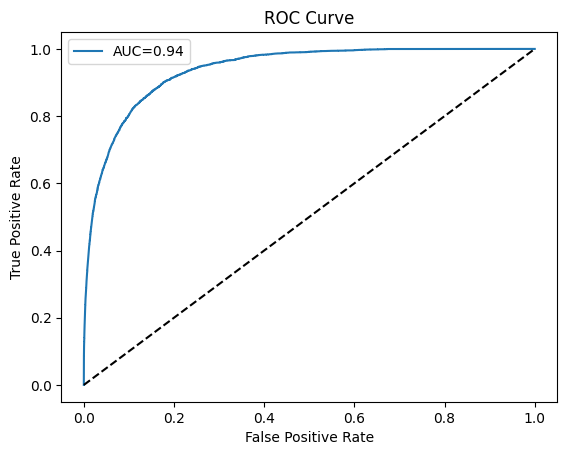

Model evaluation complete


In [10]:
model_v2, eval_metrics_v2, importance_df_v2 = model_pipeline(census_income_learn, census_income_test, clean_vars, model_v2_features, 'salary', 'instance weight', 'catboost', numeric_features, categorical_features)

In [11]:
eval_metrics_v2

{'balanced_accuracy': 0.8603304051986969,
 'precision': 0.29767066611204046,
 'recall': 0.8590096588853878,
 'f1': 0.44213076306568727}

Overall, model v2 performs the best as judged by the Balanced Accurary and AUC scores. Now let's look at which features are most important in this model.

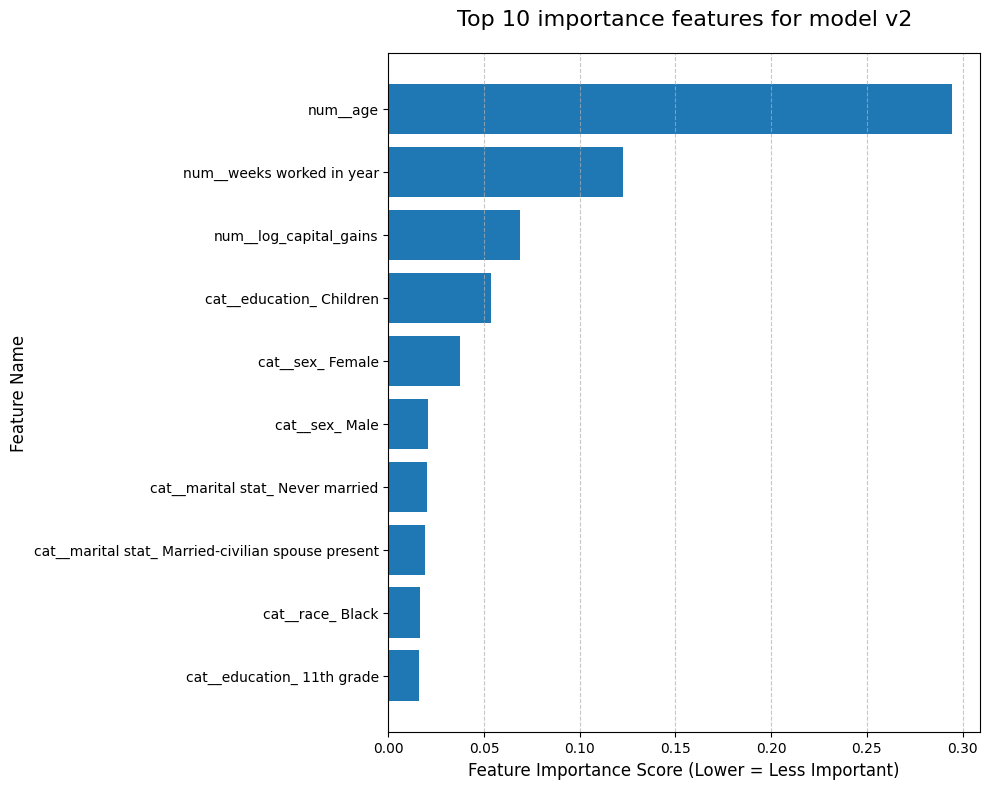

In [12]:
plot_feature_importance(importance_df_v2, 10)